# custom threshold creation

In [1]:
import numpy as np
import json
import json
import matplotlib.pyplot as plt

1. import data from pred_segments
2. get list of [confidence scores, right prediction?] for each specie
3. apply logistic regression for these values
   1. the idea is to understand for which threshold we have a right prediction

In [2]:
with open("utils/conf_scores.json", "r") as f:
    conf_scores = json.load(f)

conf_scores

{'Certhia familiaris_Eurasian Treecreeper': [[0.9614648818969727, True],
  [0.612127423286438, True],
  [0.319585919380188, False]],
 'Dendrocopos major_Great Spotted Woodpecker': [[0.37323442101478577, True],
  [0.38606294989585876, True],
  [0.9942935109138489, True],
  [0.9921521544456482, True],
  [0.2595857083797455, True],
  [0.9856369495391846, True],
  [0.9317321181297302, True],
  [0.6747986674308777, True]],
 'Dryocopus martius_Black Woodpecker': [[0.4141795039176941, True],
  [0.5386545658111572, True],
  [0.9914217591285706, True],
  [0.6053737998008728, True]],
 'Erithacus rubecula_European Robin': [[0.37281423807144165, True],
  [0.8889260292053223, True],
  [0.35592952370643616, True],
  [0.28878992795944214, True],
  [0.3566426634788513, True],
  [0.5917208790779114, True],
  [0.30085840821266174, True],
  [0.4121703505516052, True],
  [0.7519062161445618, True],
  [0.5755860209465027, False],
  [0.33459630608558655, False],
  [0.5787066221237183, True],
  [0.4799082577

In [16]:
conf_scores["Troglodytes troglodytes_Eurasian Wren"]

[[0.47124236822128296, True],
 [0.8344532251358032, True],
 [0.9504575133323669, True],
 [0.28791290521621704, True],
 [0.44030267000198364, False],
 [0.4814023971557617, True],
 [0.3780888020992279, True],
 [0.3552074730396271, False],
 [0.29943713545799255, True],
 [0.25160735845565796, True],
 [0.5983564257621765, False],
 [0.4057747721672058, False],
 [0.8357707262039185, False],
 [0.47754842042922974, True],
 [0.5236116051673889, True],
 [0.4614643454551697, True],
 [0.3787915110588074, True],
 [0.5724220871925354, True],
 [0.2953450381755829, True],
 [0.3328462839126587, True],
 [0.5242745280265808, True],
 [0.9253577589988708, True],
 [0.6505305767059326, True],
 [0.6883482336997986, True],
 [0.8011556267738342, True],
 [0.6512045860290527, True],
 [0.31284698843955994, True],
 [0.4441724419593811, False],
 [0.587338387966156, True],
 [0.7950304746627808, True],
 [0.6984190940856934, True],
 [0.3670260012149811, True],
 [0.29595500230789185, True],
 [0.3009728789329529, True],
 

In [40]:
from sklearn.metrics import precision_recall_fscore_support

best_threshold_by_species = {}
for specie, data in conf_scores.items():
    if len(data) == 0:
        print(f"Skipped specie: {specie} with {len(data)} samples")
        continue
    scores = np.array([x[0] for x in data])
    labels = np.array([x[1] for x in data])

    best_threshold = 0
    best_f1 = 0
    thresholds = np.linspace(scores.min(), scores.max(), 100)  # 50 soglie testate

    for threshold in thresholds:
        preds = scores >= threshold
        precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    best_threshold_by_species[specie] = best_threshold
    print(f"🟢 Soglia ottimale trovata per {specie}: {best_threshold:.3f} con F1-score: {best_f1:.3f}")

🟢 Soglia ottimale trovata per Certhia familiaris_Eurasian Treecreeper: 0.326 con F1-score: 1.000
🟢 Soglia ottimale trovata per Dendrocopos major_Great Spotted Woodpecker: 0.260 con F1-score: 1.000
🟢 Soglia ottimale trovata per Dryocopus martius_Black Woodpecker: 0.414 con F1-score: 1.000
🟢 Soglia ottimale trovata per Erithacus rubecula_European Robin: 0.289 con F1-score: 0.828
🟢 Soglia ottimale trovata per Fringilla coelebs_Common Chaffinch: 0.250 con F1-score: 0.719
🟢 Soglia ottimale trovata per Lophophanes cristatus_Crested Tit: 0.836 con F1-score: 1.000
🟢 Soglia ottimale trovata per Loxia curvirostra_Common Crossbill: 0.578 con F1-score: 0.683
🟢 Soglia ottimale trovata per Muscicapa striata_Spotted Flycatcher: 0.261 con F1-score: 1.000
🟢 Soglia ottimale trovata per Pecking_: 0.898 con F1-score: 0.737
🟢 Soglia ottimale trovata per Periparus ater_Coal Tit: 0.316 con F1-score: 0.926
🟢 Soglia ottimale trovata per Phylloscopus collybita_Common Chiffchaff: 0.259 con F1-score: 1.000
Skippe

In [41]:
best_threshold_by_species

{'Certhia familiaris_Eurasian Treecreeper': 0.3260695452641959,
 'Dendrocopos major_Great Spotted Woodpecker': 0.2595857083797455,
 'Dryocopus martius_Black Woodpecker': 0.4141795039176941,
 'Erithacus rubecula_European Robin': 0.28878992795944214,
 'Fringilla coelebs_Common Chaffinch': 0.250076025724411,
 'Lophophanes cristatus_Crested Tit': 0.8359681638804349,
 'Loxia curvirostra_Common Crossbill': 0.5784583434914098,
 'Muscicapa striata_Spotted Flycatcher': 0.26079103350639343,
 'Pecking_': 0.8979470868303319,
 'Periparus ater_Coal Tit': 0.31581333490333174,
 'Phylloscopus collybita_Common Chiffchaff': 0.25949913263320923,
 'Rain_': 0.2611730992794037,
 'Regulus ignicapilla_Common Firecrest': 0.3331939180692037,
 'Regulus regulus_Goldcrest': 0.2554644460629935,
 'Sylvia atricapilla_Eurasian Blackcap': 0.42233136868236043,
 'Troglodytes troglodytes_Eurasian Wren': 0.25160735845565796,
 'Turdus merula_Eurasian Blackbird': 0.5913880955089222,
 'Turdus philomelos_Song Thrush': 0.2650089

In [43]:
# save best thresholds
with open("utils/best_threshold_by_species.json", "w") as f:
    json.dump(best_threshold_by_species, f)

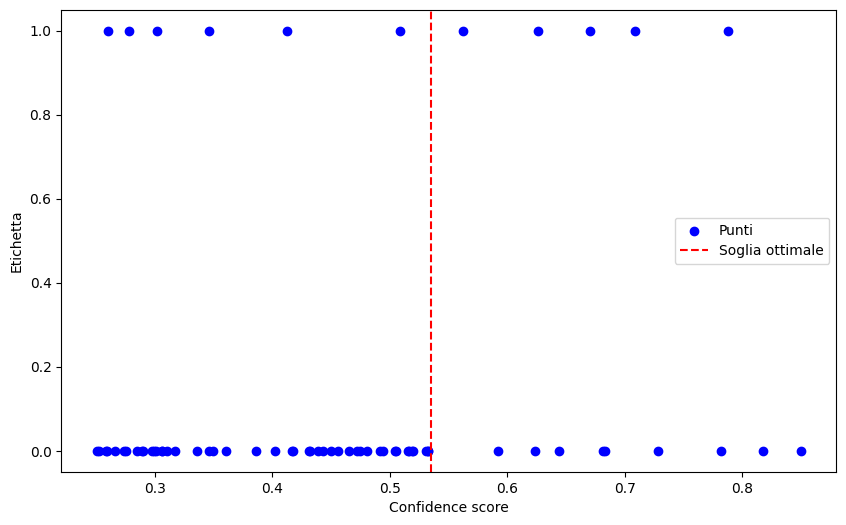

In [42]:
# visualize points with the best threshold
plt.figure(figsize=(10, 6))
plt.scatter(scores, labels, color="blue", label="Punti")
plt.axvline(x=best_threshold, color="red", linestyle="--", label="Soglia ottimale")
plt.xlabel("Confidence score")
plt.ylabel("Etichetta")
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

dataset = np.array(conf_scores["Troglodytes troglodytes_Eurasian Wren"])
X = dataset[:, 0].reshape(-1, 1)
y = dataset[:, 1].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=123, max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
plt.scatter(X, y, color='black')
plt.plot(X, lr.predict_proba(X)[:, 1], color='blue')

c:\Users\giaco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7692307692307693

In [23]:
# import svc
from sklearn.svm import SVC

# non linear kernel
svc = SVC(random_state=123, kernel="rbf", C=0.1)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

c:\Users\giaco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7692307692307693

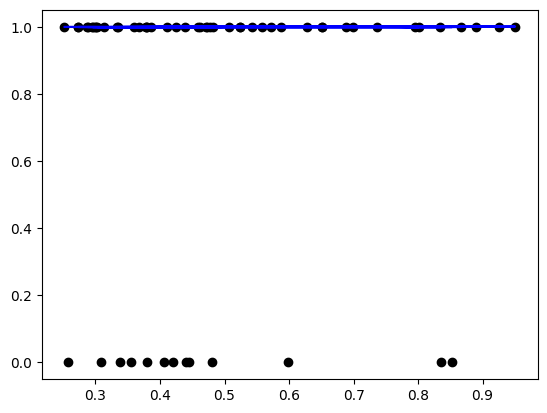

In [24]:
# visualize the svm
plt.scatter(X, y, color='black')
plt.plot(X, svc.decision_function(X), color='blue')

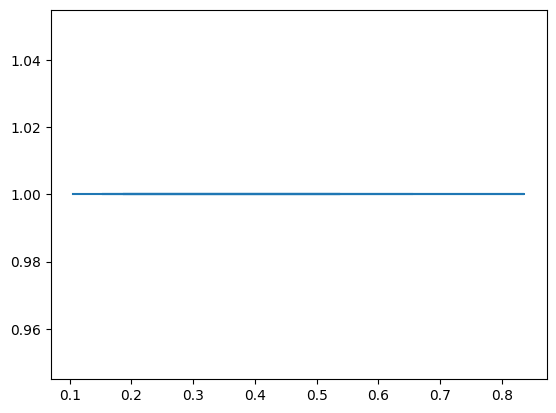

In [58]:
plt.plot(X_test, lr.predict(X_test))